<a href="https://colab.research.google.com/github/YousraMashkoor/ICPC-Pakistan-Data-Analysis/blob/master/Institution_Impact_on_Pakistan_ICPC_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statements

### Business Questions:
1. What are the characteristics of winning teams?
	- universities
	- number of teams participating
	- first to attempt?
	- factor affecting top teams

2. last year vs this year: (Not enough Data)
	- team performance
	- submission, retries, time stamps, team participations city wise
	
3. Comparison with other countries


# Imports and Installation

In [ ]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=9c1e73eddb99f1beb1a9d18e697c3ae941073fee1320213fc21a9c73d035e68f
  Stored in directory: /root/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql


In [ ]:
!pip install pandas-bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tabula-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 121.9 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from pandasql import sqldf
import itertools

from bokeh.io import output_file, show
from bokeh.layouts import row
from bokeh.plotting import figure

import pandas_bokeh
from bokeh.io import show, output_notebook
from bokeh.plotting import figure


from tabula import read_pdf
# import matplotlib.pyplot as plt


# pandas_bokeh.output_notebook()
# pd.set_option('plotting.backend', 'pandas_bokeh')

# Data Collection

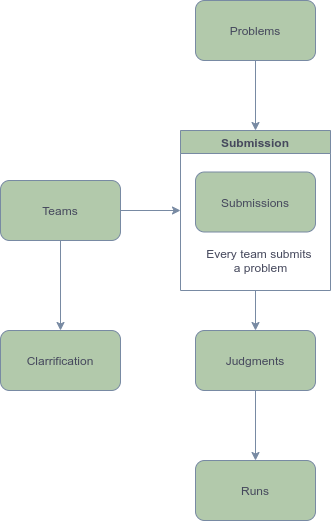

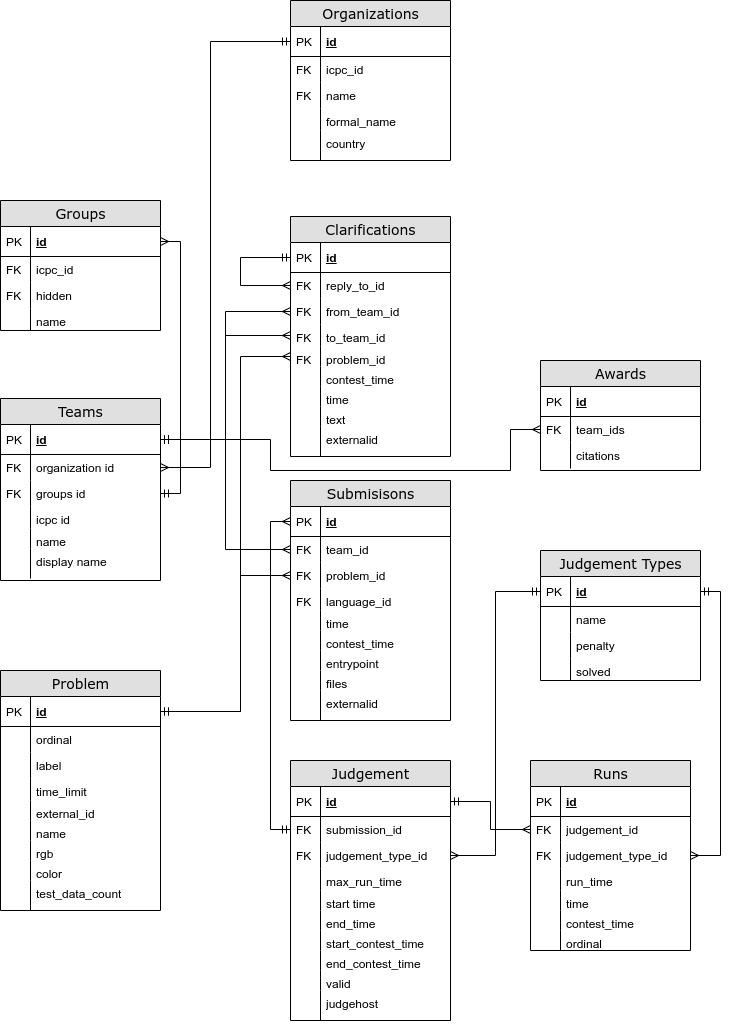

Final round 2021:  
*  formatted data  
*  convert to DF from json  

Qualification round 2021:  
* unformatted data  
* convert to DF from json  
	

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **2021**

### 2021 ICPC Asia Topi Online Preliminary (Reading CDP Logs)

In [ ]:
'''
********************************************************************************
***********************  NEED TO RUN ONLY ONCE *********************************
********************************************************************************

This script unzip the CDP and convert logs into separate json files inside
"formatted-json", which is later used to cread DF for analysis.
'''

import json
import os


# setting up path and directories
path = os.path.join('/content/drive/MyDrive/ICPC_Data/Sorted_Records/2021/2021AsiaTopiPreliminary')

%cd {path}
!unzip '/content/drive/MyDrive/ICPC_Data/Sorted_Records/2021/2021AsiaTopiPreliminary/Trail-round-2021-CDP.zip'
%cd '{path}/CDP/events'
%pwd
%mkdir '/content/drive/MyDrive/ICPC_Data/Sorted_Records/2021/2021AsiaTopiPreliminary/formatted-jsons'


#creating formatted json files
file = open('events.json')
file.readline()
file.readline()
types = []
while True:
  line = file.readline()
  if not line:
    break
  line = json.loads(line)
  with open(f'{path}/formatted-jsons/{line["type"]}.json', 'a+') as wf:
    if line["type"] not in types:
      # import pdb; pdb.set_trace()
      types.append(line["type"])
    
    ## for correct json formatting, add opening bracket
    if os.stat(f'{path}/formatted-jsons/{line["type"]}.json').st_size == 0:
      wf.write('[')
      wf.write(json.dumps(line['data']))
      continue
    ## writing both create and update operations
    wf.write(',')
    wf.write(json.dumps(line['data']))
    wf.write('\n')

for filename in os.listdir(os.getcwd()):
   with open(os.path.join(os.getcwd(), filename), 'a+') as f:
     f.write(']')

%cd {path}/formatted-jsons

import os
for filename in os.listdir(os.getcwd()):
   with open(os.path.join(os.getcwd(), filename), 'a+') as f:
     f.write(']')

# removing the folder
%rm -rf '{path}/CDP'

'\n********************************************************************************\n***********************  NEED TO RUN ONLY ONCE *********************************\n********************************************************************************\n\nThis script unzip the CDP and convert logs into separate json files inside\n"formatted-json", which is later used to cread DF for analysis.\n'

In [ ]:
ls

drive/  sample_data/


In [ ]:
%cd /content/drive/MyDrive/ICPC_Data/Sorted_Records/2021/2021AsiaTopiPreliminary/formatted-jsons

# df_c = dataframe of clarifications
clarif_qual21 = pd.read_json('clarifications.json') #DONE

# df_j = dataframe of judgements
judg_qual21 = pd.read_json('judgements.json') #DONE

# df_p = dataframe of problems
problems_qual21 = pd.read_json('problems.json') #DONE

# df_r = dataframe of runs
runs_qual21 = pd.read_json('runs.json') #DONE

# df_s = dataframe of submissions
sub_qual21 = pd.read_json('submissions.json') #DONE

# df_t = dataframe of teams
teams_qual21 = pd.read_json('teams.json') #DONE

organizations_qual21 = pd.read_json('organizations.json') #DONE
groups_qual21 = pd.read_json('groups.json') #DONE
awards_qual21 = pd.read_json('awards.json') #DONE
judg_types_qual21 = pd.read_json('judgement-types.json') #DONE
state_qual21 = pd.read_json('state.json')
contests_qual21 = pd.read_json('contests.json')

/content/drive/MyDrive/ICPC_Data/Sorted_Records/2021/2021AsiaTopiPreliminary/formatted-jsons


In [ ]:
judg_qual21[judg_qual21['valid'] == True]


,max_run_time,start_time,start_contest_time,end_time,end_contest_time,id,submission_id,valid,judgehost,judgement_type_id
0,NaN,2022-01-26 11:30:29.301000+05:00,0:00:29.301,NaT,None,880,867,True,domjudge-2,None
1,0.014,2022-01-26 11:30:29.301000+05:00,0:00:29.301,2022-01-26 11:30:29.846000+05:00,0:00:29.846,880,867,True,domjudge-2,AC
2,NaN,2022-01-26 11:30:44.410000+05:00,0:00:44.410,NaT,None,881,868,True,domjudge-3,None
3,0.003,2022-01-26 11:30:44.410000+05:00,0:00:44.410,2022-01-26 11:30:45.636000+05:00,0:00:45.636,881,868,True,domjudge-3,RTE
4,NaN,2022-01-26 11:30:45.690000+05:00,0:00:45.690,NaT,None,882,869,True,domjudge-3,None
...,...,...,...,...,...,...,...,...,...,...
3676,NaN,2022-01-27 10:31:56.027000+05:00,23:01:56.027,NaT,None,3016,2576,True,domjudge-0,None
3677,0.015,2022-01-27 10:31:56.027000+05:00,23:01:56.027,2022-01-27 10:31:56.754000+05:00,23:01:56.753,3016,2576,True,domjudge-0,RTE
3678,NaN,2022-01-28 12:15:25.398000+05:00,48:45:25.398,NaT,None,3017,2577,True,domjudge-3,None
3679,3.996,2022-01-28 12:15:25.398000+05:00,48:45:25.398,2022-01-28 12:15:30.589000+05:00,48:45:30.589,3017,2577,True,domjudge-3,TLE


### 2021 ICPC Asia Topi Regional On-site Contest (Reading CDP Logs)

In [ ]:
'''
********************************************************************************
***********************  NEED TO RUN ONLY ONCE *********************************
********************************************************************************

This script unzip the CDP and convert logs into separate json files inside
"formatted-json", which is later used to cread DF for analysis.
'''

import json
import os


# setting up path and directories
path = os.path.join('/content/drive/MyDrive/ICPC_Data/Sorted_Records/2021/2021AsiaTopiRegional')

%cd {path}
!unzip '{path}/Final-Round-2021-CDP.zip'
%cd '{path}/CDP/events'
%pwd
%mkdir '{path}/formatted-jsons'


#creating formatted json files
file = open('events.json')
file.readline()
file.readline()
types = []
while True:
  line = file.readline()
  if not line:
    break
  line = json.loads(line)
  with open(f'{path}/formatted-jsons/{line["type"]}.json', 'a+') as wf:
    if line["type"] not in types:
      # import pdb; pdb.set_trace()
      types.append(line["type"])
    
    ## for correct json formatting, add opening bracket
    if os.stat(f'{path}/formatted-jsons/{line["type"]}.json').st_size == 0:
      wf.write('[')
      wf.write(json.dumps(line['data']))
      continue
    ## writing both create and update operations
    wf.write(',')
    wf.write(json.dumps(line['data']))
    wf.write('\n')

for filename in os.listdir(os.getcwd()):
   with open(os.path.join(os.getcwd(), filename), 'a+') as f:
     f.write(']')

%cd {path}/formatted-jsons

import os
for filename in os.listdir(os.getcwd()):
   with open(os.path.join(os.getcwd(), filename), 'a+') as f:
     f.write(']')


# removing the folder
%rm -rf '{path}/CDP'

'\n********************************************************************************\n***********************  NEED TO RUN ONLY ONCE *********************************\n********************************************************************************\n\nThis script unzip the CDP and convert logs into separate json files inside\n"formatted-json", which is later used to cread DF for analysis.\n'

In [ ]:
'''
********************************************************************************
***********************  NEED TO RUN ONLY ONCE *********************************
********************************************************************************

This script copies the required json filed from APIS to formatted-jsons.
'''

setting up path and directories
path = os.path.join('/content/drive/MyDrive/ICPC_Data/Sorted_Records/2021/2021AsiaTopiRegional')

%cd {path}
!unzip '{path}/Final-Round-2021-APIS.zip'

teamsapi_regional21 = pd.read_json('/content/drive/MyDrive/ICPC_Data/Sorted_Records/2021/2021AsiaTopiRegional/Data_for_analytics/teams.json') #DONE

%cp -R '{path}/Data_for_analytics/scoreboard.json' '{path}/formatted-jsons'

# removing the folder
%rm -rf '{path}/Data_for_analytics'


In [ ]:
teamsapi_regional21 = pd.read_json('/content/drive/MyDrive/ICPC_Data/Sorted_Records/2021/2021AsiaTopiRegional/Data_for_analytics/teams.json') #DONE

In [ ]:
pwd

'/content/drive/MyDrive/ICPC_Data/Sorted_Records/2021/2021AsiaTopiPreliminary/formatted-jsons'

In [ ]:
%cd /content/drive/MyDrive/ICPC_Data/Sorted_Records/2021/2021AsiaTopiRegional/formatted-jsons

# df_c = dataframe of clarifications
clarif_regional21 = pd.read_json('clarifications.json') #DONE

# df_j = dataframe of judgements
judg_regional21 = pd.read_json('judgements.json') #DONE

# df_p = dataframe of problems
problems_regional21 = pd.read_json('problems.json') #DONE

# df_r = dataframe of runs
runs_regional21 = pd.read_json('runs.json') #DONE

# df_s = dataframe of submissions
sub_regional21 = pd.read_json('submissions.json') #DONE

# df_t = dataframe of teams
teams_regional21 = pd.read_json('teams.json') #DONE

organizations_regional21 = pd.read_json('organizations.json') #DONE
groups_regional21 = pd.read_json('groups.json') #DONE
judg_types_regional21 = pd.read_json('judgement-types.json') #DONE
state_regional21 = pd.read_json('state.json')
contests_regional21 = pd.read_json('contests.json')

/content/drive/MyDrive/ICPC_Data/Sorted_Records/2021/2021AsiaTopiRegional/formatted-jsons


In [ ]:
score_regional21 = pd.read_json('scoreboard.json', orient = 'record') #DONE
score_regional21 = pd.DataFrame.from_records(score_regional21['rows'])
score = pd.DataFrame.from_records(score_regional21['score'])

score_regional21 = pd.merge(score_regional21, score, left_index=True, right_index=True)
score_regional21.drop('score', axis=1, inplace=True) 

In [ ]:
def create_problems(row):
  return pd.DataFrame(row['problems'])

score_regional21['problems'] = score_regional21.apply(create_problems, axis=1)

In [ ]:
score_regional21.head()

,rank,team_id,problems,num_solved,total_time
0,1,152,label problem_id num_judged num_pendi...,7,684
1,2,165,label problem_id num_judged num_pendi...,6,502
2,3,159,label problem_id num_judged num_pendi...,5,698
3,4,172,label problem_id num_judged num_pendi...,4,203
4,5,151,label problem_id num_judged num_pendi...,4,267


In [ ]:
score_regional21['problems'].loc[0]

,label,problem_id,num_judged,num_pending,solved,first_to_solve,time
0,Alien,16,0,0,False,False,NaN
1,Bunnies,18,3,0,True,False,225.0
2,Car,22,0,0,False,False,NaN
3,Customers,17,2,0,True,False,63.0
4,Drone,19,1,0,True,False,28.0
5,Exam,24,2,0,True,True,75.0
6,Nature,20,1,0,True,False,35.0
7,Phrases,23,1,0,True,False,125.0
8,Research,25,1,0,True,False,53.0
9,Tree,21,0,0,False,False,NaN


#### Final Round (Reading API)

In [ ]:
# import pandas as pd
# # df_c = dataframe of clarifications
# clarif_final22 = pd.read_json('Data_for_analytics/clarifications.json')

# # df_j = dataframe of judgements
# judg_final22 = pd.read_json('Data_for_analytics/judgments.json')

# # df_p = dataframe of problems
# problems_final22 = pd.read_json('Data_for_analytics/problems.json')

# # df_r = dataframe of runs
# runs_final22 = pd.read_json('Data_for_analytics/runs.json')

# # df_s = dataframe of submissions
# sub_final22 = pd.read_json('Data_for_analytics/submissions.json')

# # df_t = dataframe of teams
# teams_final22 = pd.read_json('Data_for_analytics/teams.json')

In [ ]:
# # df_sb = dataframe of scoreboard
# df_sb = pd.read_json('Data_for_analytics/new_scoreboard.json')

In [ ]:
# df_e = dataframe of events
# df_e = pd.read_json('Data_for_analytics/events.json')

### 2021 ICPC World Finals (Reading PDF)

In [ ]:
data = read_pdf('/content/drive/MyDrive/ICPC_Data/Sorted_Records/2021/2021WorldFinals/2021WorldFinal.pdf', pandas_options = {'header': None, }, pages = 1)
df = data[0]

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1,♥,North AmericaMassachusetts Institute of Techno...,111339,50\r1 try,NaN,184\r2 tries,NaN,25\r2 tries,NaN,...,NaN,43\r2 tries,NaN,106\r1 try,NaN,69\r1 try,NaN,248\r1 try,NaN,30\r1 try
1,2,♥,Asia EastPeking University,101711,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,71\r1 try,NaN,133\r4 tries,NaN,104\r3 tries,NaN,...,NaN,48\r4 tries,NaN,204\r1 try,NaN,69\r2 tries,167\r1 try,NaN,NaN,NaN
3,3,♥,Asia PacificThe University of Tokyo,91036,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,128\r1 try,NaN,150\r1 try,NaN,47\r1 try,NaN,...,271\r3 tries,NaN,37\r1 try,NaN,5 tries,NaN,177\r2 tries,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,♥,Universidad Tecnologica de Pereira,00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,♥,University of Chinese Academy of Sciences,00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Analysis

In [ ]:
import pandas as pd
pd.DataFrame(
    {
        "Name": ["2021 ICPC Asia Topi Online Preliminary", "2021 ICPC Asia Topi Regional On-site Contest", "2021 ICPC World Finals"],
        "Teams": [191,49,132],
        "Universities": [34,19,132]

    }
)

,Name,Teams,Universities
0,2021 ICPC Asia Topi Online Preliminary,191,34
1,2021 ICPC Asia Topi Regional On-site Contest,49,19
2,2021 ICPC World Finals,132,132


In [ ]:
pd.DataFrame(
    {
        "Name": ["2021 ICPC Asia Topi Online Preliminary", "2021 ICPC Asia Topi Regional On-site Contest", "2021 ICPC World Finals"],
        "Teams": [191,49,132],
        "Universities": [34,19,132]

    }
)

,Name,Teams,Universities
0,2021 ICPC Asia Topi Online Preliminary,191,34
1,2021 ICPC Asia Topi Regional On-site Contest,49,19
2,2021 ICPC World Finals,132,132


## 1. What are the characteristics of winning teams?

### **Adding organization name to teams DF**

In [ ]:
organizations_qual21

,icpc_id,id,name,formal_name,country
0,1,1,BUK,"Bahria University, Karachi",PAK
1,10,10,WAH,University of Wah,PAK
2,100,100,FAST-KHI,NU-FAST Karachi,PAK
3,101,101,FAST-KHI,NU-FAST Karachi,PAK
4,102,102,FAST-KHI,NU-FAST Karachi,PAK
...,...,...,...,...,...
147,97,97,IBA-KHI,"Institute of Business Administration, Karachi",PAK
148,98,98,IBA-KHI,"Institute of Business Administration, Karachi",PAK
149,99,99,HABIB,Habib University,PAK
150,136,136,FAST-ISB,National University of Computer and Emerging S...,PAK


In [ ]:
organizations_qual21['formal_name'].unique()

array(['Bahria University, Karachi', 'University of Wah',
       'NU-FAST Karachi', 'Habib University',
       'National University of Computer and Emerging Sciences',
       'FAST National University of Computer and Emerging Sciences, Lahore',
       'FAST National University Faisalabad',
       'Muhammad Ali Jinnah University', 'Unknown',
       'Capital University of Science and Technology',
       'Punjab University College of Information Technology',
       'Hamdard University',
       'GIK Institute of Engineering Sciences and Technology',
       'National University of Computer and Emerging Sciences, ISB',
       'Information Technology University Punjab',
       'Institute of Business Administration, Karachi',
       'FAST-National University of Computer and Emerging Sciences Peshawar',
       'University of Karachi/Department of Computer Science',
       'COMSATS UNIVERSITY ISLAMABAD'], dtype=object)

In [ ]:
teams_qual21['affiliation'] = teams_qual21.apply(lambda team: sqldf(f'select formal_name from organizations_qual21 where id = {team["organization_id"]} limit 1')['formal_name'][0], axis=1)
teams_qual21

,group_ids,id,icpc_id,name,display_name,organization_id,affiliation
0,[3],1,656417.0,Null Value,None,1,"Bahria University, Karachi"
1,[3],10,656752.0,Beta,None,10,University of Wah
2,[3],100,658173.0,The Vectors,None,100,NU-FAST Karachi
3,[3],101,657965.0,Titanium,None,101,NU-FAST Karachi
4,[3],102,657962.0,Static Startup,None,102,NU-FAST Karachi
...,...,...,...,...,...,...,...
153,[3],139,111114.0,Crafty Coders,None,55,Punjab University College of Information Techn...
154,[3],151,NaN,Code on Duty,Code on Duty,133,Muhammad Ali Jinnah University
155,[3],151,661111.0,Code on Duty,Code on Duty,133,Muhammad Ali Jinnah University
156,[3],152,657966.0,Inexperienced Coders,Inexperienced Coders,13,NU-FAST Karachi


In [ ]:
# regional on-site

organizations_regional21['formal_name'].unique()
teams_regional21

# teams_regional21['affiliation'] = teams_regional21.apply(lambda team: sqldf(f'select formal_name from organizations_regional21 where id = {team["organization_id"]} limit 1')['formal_name'][0], axis=1)
# teams_regional21

,group_ids,affiliation,nationality,id,icpc_id,name,display_name,organization_id,members
0,[1],None,None,1,NaN,DOMjudge,None,NaN,NaN
1,[3],FAST National University of Computer and Emerg...,PAK,101,488482.0,OVERLOADS,None,2.0,NaN
2,[3],FAST-National University of Computer and Emerg...,PAK,102,540239.0,Callback Cats,None,3.0,NaN
3,[3],FAST-National University of Computer and Emerg...,PAK,103,540238.0,Team Baloc,None,3.0,NaN
4,[3],FAST-National University of Computer and Emerg...,PAK,104,540236.0,Runtime Terror,None,3.0,NaN
...,...,...,...,...,...,...,...,...,...
109,[3],Ghulam Ishaq Khan Institute of Engineering Sci...,PAK,158,662306.0,Runtime Terror GIK,None,11.0,NaN
110,[3],FAST National University of Computer and Emerg...,PAK,157,662333.0,Runtime Terror 2,None,2.0,NaN
111,[3],Ghulam Ishaq Khan Institute of Engineering Sci...,PAK,158,662306.0,Runtime Terror,None,11.0,NaN
112,[3],Hamdard University,PAK,145,662014.0,Team Hamdard Coders,None,15.0,NaN


### **getting unique teams**

In [ ]:
# preliminary
print("Total recrods: ", teams_qual21.shape)
print("Total unique team and university names: ", teams_qual21[['name', 'affiliation']].value_counts().shape)
teams_qual21['name'].unique().shape

group = pd.DataFrame(teams_qual21.groupby('name').size())
display("Group by name", group[group[0]>1])
group = pd.DataFrame(teams_qual21.groupby(['name', 'affiliation']).size())
display("Group by name and affilication", group[group[0]>1])

Total recrods:  (158, 7)
Total unique team and university names:  (155,)


'Group by name'

,0
name,
Code Warriors,2
Code on Duty,2
CodeX,2
Crafty Coders,2
Team WHOMST,2
The Linkers,2


'Group by name and affilication'

,,0
name,affiliation,
Code Warriors,"Institute of Business Administration, Karachi",2
Code on Duty,Muhammad Ali Jinnah University,2
Team WHOMST,Unknown,2


In [ ]:
teams_qual21[teams_qual21['name'].isin(['CodeX','Crafty Coders', 'The Linkers'])]

,group_ids,id,icpc_id,name,display_name,organization_id,affiliation
42,[3],137,111112.0,The Linkers,None,137,Unknown
43,[3],138,111113.0,CodeX,None,138,Unknown
44,[3],139,111114.0,Crafty Coders,None,139,Unknown
151,[3],137,111112.0,The Linkers,None,114,FAST National University Faisalabad
152,[3],138,111113.0,CodeX,None,116,FAST National University Faisalabad
153,[3],139,111114.0,Crafty Coders,None,55,Punjab University College of Information Techn...


In [ ]:
#regional

print("Total recrods: ", teams_regional21.shape)
print("Total unique team", teams_regional21['name'].value_counts().shape)
print("Total unique team and university names: ", teams_regional21[['name', 'affiliation']].value_counts().shape)
teams_regional21['name'].unique().shape

group = pd.DataFrame(teams_regional21.groupby('name').size())
display("Group by name", group[group[0]>1])
group = pd.DataFrame(teams_regional21.groupby(['name', 'affiliation']).size())
display("Group by name and affilication", group[group[0]>1])

Total recrods:  (114, 9)
Total unique team (72,)
Total unique team and university names:  (76,)


'Group by name'

,0
name,
Algo Geeks,2
Alpha,2
CallBack coders,2
Dark Code,2
Professional Google Searchers,2
Runtime Terror,2
Runtime Terror 2,4
Runtime Terror GIK,2
Spartans,2


'Group by name and affilication'

,,0
name,affiliation,
Algo Geeks,Punjab University College of Information Technology,2
CallBack coders,University of Karachi,2
Dark Code,Punjab University College of Information Technology,2
Runtime Terror 2,"FAST National University of Computer and Emerging Sciences, Lahore",3
Runtime Terror GIK,Ghulam Ishaq Khan Institute of Engineering Sciences and Technology,2
Yohsin,Habib University,3
Yoshin,Habib University,2


In [ ]:
teams_regional21[teams_regional21['name'].isin(['Alpha','Runtime Terror','Runtime Terror GIK', 'Yohsin','Yoshin','Runtime Terror 2', 'Professional Google Searchers','Spartans','Stack Underflow','Titans'])].sort_values('name')

,group_ids,affiliation,nationality,id,icpc_id,name,display_name,organization_id,members
24,[3],Punjab University College of Information Techn...,PAK,127,661683.0,Alpha,None,9.0,NaN
95,[3],University of Wah,PAK,169,661683.0,Alpha,None,18.0,NaN
107,[3],National University of Computer and Emerging S...,PAK,174,662566.0,Professional Google Searchers,None,13.0,NaN
101,[3],Punjab University College of Information Techn...,PAK,174,662566.0,Professional Google Searchers,None,9.0,NaN
4,[3],FAST-National University of Computer and Emerg...,PAK,104,540236.0,Runtime Terror,None,3.0,NaN
111,[3],Ghulam Ishaq Khan Institute of Engineering Sci...,PAK,158,662306.0,Runtime Terror,None,11.0,NaN
110,[3],FAST National University of Computer and Emerg...,PAK,157,662333.0,Runtime Terror 2,None,2.0,NaN
57,[3],Ghulam Ishaq Khan Institute of Engineering Sci...,PAK,157,662306.0,Runtime Terror 2,None,11.0,NaN
108,[3],FAST National University of Computer and Emerg...,PAK,157,6623331.0,Runtime Terror 2,None,2.0,NaN
93,[3],FAST National University of Computer and Emerg...,PAK,157,662306.0,Runtime Terror 2,None,2.0,NaN


In [ ]:
print("There are some repeated teams with unknown affiliation or repeated name, affiliation combo. So to check total team we have: ")

print("Preliminary 2021: ", teams_qual21['name'].unique().shape)
print("Regional Onsite: ", teams_regional21[['name', 'id']].value_counts().shape[0] - 4) #subtracting 4 entries of yoshin

There are some repeated teams with unknown affiliation or repeated name, affiliation combo. So to check total team we have: 
Preliminary 2021:  (152,)
Regional Onsite:  75


In [ ]:
## confirming records from APIs

teamsapi_regional21['id'].value_counts().shape
# teamsapi_regional21.shape

(48,)

In [ ]:
list(teamsapi_regional21['name'].unique())

['DOMjudge',
 'Algorithm Unlock',
 'Blind Samurais',
 'callback cats',
 'CallBack coders',
 'cardinals',
 'Checkmate',
 'Coding bats',
 'Debuggers',
 'GFG Pirates',
 'Glitch',
 'HaCougars',
 'Dark Code',
 'Hash Squad',
 'Hypertest Assassian',
 'HU-LIONS',
 'Keyboard Strikers',
 'Team Hamdard Coders',
 'Lady Bugs',
 'Multiverse',
 'Manderbolt',
 'maverics',
 'Overloads',
 'Pegasus',
 'Pentateuch',
 'PUCIT_F18_NC',
 'Pirate Bay',
 'Renegades',
 'Qubits',
 'Runtime Terror 2',
 'Runtime Terror',
 'SignBit',
 'Sevens',
 'Stack Underflow',
 'The Vectors',
 'Spartans',
 'Titans',
 'Trojans 1',
 'Vangola',
 'X/0 possibilities',
 'Alpha',
 'Yohsin',
 'Frostysolutions',
 'Algo Geeks',
 'Team of culture',
 'Professional Google Searchers',
 'GiGa X-Division 9',
 'Runtime Terror 1']

In [ ]:
set(list(teams_regional21['name'].unique())).symmetric_difference(set(list(teamsapi_regional21['name'].unique())))

# diff(list(teams_regional21['name'].unique()), list(teamsapi_regional21['name'].unique()))

{'Alog Geeks',
 'Back Trackers',
 'Brogrammers',
 'Callback Cats',
 'Code-Blooded',
 'Coding Bats',
 'Frosty Solution',
 'Hamdard Coders',
 'Non-Pythonic',
 'OVERLOADS',
 'PUCIT_NC_BCS_18_M',
 'PUCIT_NC_BCS_19A',
 'PUCIT_NC_BCS_F18A',
 'PUCIT_OC_BSE_19M',
 'Phoenix',
 'Pythonic warriors',
 'Runtime Error 2',
 'Runtime Terror GIK',
 'Sputnik',
 'Team Baloc',
 'TheVectors',
 'Trojans',
 'Yoshin',
 'Zeast',
 nan}

### **Getting top team ids**

In [ ]:
awards_qual21.shape

(11, 3)

In [ ]:
awards_qual21.head(11)

,id,citation,team_ids
0,group-winner-3,Winner(s) of group Participants,[66]
1,first-to-solve-14,First to solve problem 14,[38]
2,first-to-solve-9,First to solve problem 9,[66]
3,first-to-solve-13,First to solve problem 13,[72]
4,first-to-solve-10,First to solve problem 10,[93]
5,first-to-solve-8,First to solve problem 8,[100]
6,first-to-solve-12,First to solve problem 12,[100]
7,winner,Contest winner,[66]
8,gold-medal,Gold medal winner,"[66, 108, 76, 100]"
9,silver-medal,Silver medal winner,"[103, 71, 51, 50]"


In [ ]:
awards_qual21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11 non-null     object
 1   citation  11 non-null     object
 2   team_ids  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


In [ ]:
# getting ids of winning teams
winning_teams = list(awards_qual21.loc[awards_qual21['id'].isin(['winner', 'gold-medal', 'silver-medal', 'bronze-medal', 'group-winner-3'])]['team_ids'])
# converting lists of lists to 1D
winning_teams = list(itertools.chain(*winning_teams))
#converting stirng ids to int
winning_teams = [int(x) for x in winning_teams]
# getting dataframe
winning_teams = teams_qual21[teams_qual21['id'].isin(winning_teams)]
winning_teams

,group_ids,id,icpc_id,name,display_name,organization_id,affiliation
2,[3],100,658173.0,The Vectors,None,100,NU-FAST Karachi
5,[3],103,657394.0,Trojans 1,None,103,NU-FAST Karachi
6,[3],104,657963.0,Algorithm Unlock,None,104,NU-FAST Karachi
10,[3],108,657045.0,Yohsin,None,108,Habib University
11,[3],109,657932.0,Multiverse,None,109,Habib University
96,[3],50,657244.0,Renegades,None,50,Punjab University College of Information Techn...
97,[3],51,656761.0,Lady Bugs,None,51,Punjab University College of Information Techn...
98,[3],52,656751.0,Glitch,None,52,Punjab University College of Information Techn...
110,[3],63,656879.0,Dark Code,None,63,Punjab University College of Information Techn...
113,[3],66,657473.0,Pentateuch,None,66,GIK Institute of Engineering Sciences and Tech...


In [ ]:
topPerformers_teams = list(awards_qual21.loc[awards_qual21['id'].str.startswith('first-to-solve')]['team_ids'])
topPerformers_teams = list(itertools.chain(*topPerformers_teams))
topPerformers_teams = [int(x) for x in topPerformers_teams]
topPerformers_teams = teams_qual21[teams_qual21['id'].isin(topPerformers_teams)]
# taking intersection of winning_teams and top_performers so, same team is not repeated twice
topPerformers_teams = pd.merge(topPerformers_teams, winning_teams, how='left', on=['id'], 
              indicator=True, suffixes=('', '_DROP')).query(
                  '_merge=="left_only"').filter(regex='^(?!.*_DROP)').drop('_merge', axis=1)
topPerformers_teams.head()


,group_ids,id,icpc_id,name,display_name,organization_id,affiliation
1,[3],38,656689.0,Qubits,None,38,Capital University of Science and Technology
3,[3],72,657080.0,Professional Google Searchers,None,72,National University of Computer and Emerging S...
4,[3],93,657842.0,Stack Underflow,None,93,Habib University


In [ ]:
# getting ids of all top teams
allTop_teams = list(awards_qual21['team_ids'])
# converting lists of lists to 1D
allTop_teams = list(itertools.chain(*allTop_teams))
#converting stirng ids to int
allTop_teams = [int(x) for x in allTop_teams]
# getting dataframe
allTop_teams = teams_qual21[teams_qual21['id'].isin(allTop_teams)]
allTop_teams

,group_ids,id,icpc_id,name,display_name,organization_id,affiliation
2,[3],100,658173.0,The Vectors,None,100,NU-FAST Karachi
5,[3],103,657394.0,Trojans 1,None,103,NU-FAST Karachi
6,[3],104,657963.0,Algorithm Unlock,None,104,NU-FAST Karachi
10,[3],108,657045.0,Yohsin,None,108,Habib University
11,[3],109,657932.0,Multiverse,None,109,Habib University
82,[3],38,656689.0,Qubits,None,38,Capital University of Science and Technology
96,[3],50,657244.0,Renegades,None,50,Punjab University College of Information Techn...
97,[3],51,656761.0,Lady Bugs,None,51,Punjab University College of Information Techn...
98,[3],52,656751.0,Glitch,None,52,Punjab University College of Information Techn...
110,[3],63,656879.0,Dark Code,None,63,Punjab University College of Information Techn...


In [ ]:
# regional 2021

def get_first_to_solve(row):
  if row['problems'][row['problems']['first_to_solve']==True].empty:
    return False
  else:
    return True

def get_first_to_solve_problem_id(row):
  problem = row['problems'][row['problems']['first_to_solve']==True]
  if problem.empty:
    return None
  else:
    return list(map(int,problem['problem_id']))


score_regional21['first_to_solve'] = score_regional21.apply(get_first_to_solve, axis=1)
score_regional21['first_to_solve_problem_id'] = score_regional21.apply(get_first_to_solve_problem_id, axis=1)

score_regional21

,rank,team_id,problems,num_solved,total_time,first_to_solve,first_to_solve_problem_id
0,1,152,label problem_id num_judged num_pendi...,7,684,True,[24]
1,2,165,label problem_id num_judged num_pendi...,6,502,True,"[17, 23]"
2,3,159,label problem_id num_judged num_pendi...,5,698,True,[18]
3,4,172,label problem_id num_judged num_pendi...,4,203,False,None
4,5,151,label problem_id num_judged num_pendi...,4,267,False,None
5,6,155,label problem_id num_judged num_pendi...,4,282,True,[25]
6,7,147,label problem_id num_judged num_pendi...,4,284,False,None
7,8,128,label problem_id num_judged num_pendi...,4,313,False,None
8,9,174,label problem_id num_judged num_pendi...,4,347,False,None
9,10,150,label problem_id num_judged num_pendi...,4,367,False,None


In [ ]:
x = score_regional21['problems'][1][score_regional21['problems'][1]['first_to_solve']==True]
list(map(int,x['problem_id']))

[17, 23]

### **Top team University wise (Preliminary)**

In [ ]:
winning_teams.shape

(12, 7)

In [ ]:
participants = teams_qual21.groupby('affiliation').size().to_frame()
win_group = winning_teams.groupby('affiliation').size().to_frame()
topPerformers_teams = topPerformers_teams.groupby('affiliation').size().to_frame()

In [ ]:
participants.rename(columns={0: "Other Participants"}, inplace=True)
participants['Top Performers'] = topPerformers_teams[0]
participants['Winners'] = win_group[0]

# replace NaN with "0"
participants = participants.fillna(0)

In [ ]:
# adjusting factors
participants['Other Participants'] = participants['Other Participants'].subtract(participants['Winners']+participants['Top Performers'])

In [ ]:
participants

,Other Participants,Top Performers,Winners
affiliation,,,
"Bahria University, Karachi",6.0,0.0,0.0
COMSATS UNIVERSITY ISLAMABAD,1.0,0.0,0.0
Capital University of Science and Technology,35.0,1.0,0.0
FAST National University Faisalabad,21.0,0.0,0.0
"FAST National University of Computer and Emerging Sciences, Lahore",5.0,0.0,0.0
FAST-National University of Computer and Emerging Sciences Peshawar,5.0,0.0,0.0
GIK Institute of Engineering Sciences and Technology,5.0,0.0,1.0
Habib University,5.0,1.0,2.0
Hamdard University,1.0,0.0,0.0


In [ ]:
win_rate = participants
win_rate['rate'] = participants['Other Participants']+participants['Winners']+participants['Top Performers']
win_rate['rate'] = (participants['Winners']+participants['Top Performers'])/win_rate['rate']*100

win_rate['rate'] = round(win_rate['rate'],2)
win_rate.sort_values('rate', ascending=False)

,Other Participants,Top Performers,Winners,rate
affiliation,,,,
Habib University,5.0,1.0,2.0,37.50
"National University of Computer and Emerging Sciences, ISB",4.0,1.0,1.0,33.33
NU-FAST Karachi,8.0,0.0,4.0,33.33
Punjab University College of Information Technology,11.0,0.0,4.0,26.67
GIK Institute of Engineering Sciences and Technology,5.0,0.0,1.0,16.67
Capital University of Science and Technology,35.0,1.0,0.0,2.78
"Bahria University, Karachi",6.0,0.0,0.0,0.00
Muhammad Ali Jinnah University,5.0,0.0,0.0,0.00
University of Wah,4.0,0.0,0.0,0.00


In [ ]:
# setting default plot to bokeh

pandas_bokeh.output_notebook()
pd.set_option('plotting.backend', 'pandas_bokeh')

In [ ]:
# create stacked bar chart for each university's participation
participants.plot(kind='barh', stacked=True, figsize=(1000, 650), 
                  xlabel='Total Count', ylabel='Universities', title='Universiitites Performance in Pakistan Preliminary Round 2021',
                  width=0.9, y=['Other Participants', 'Winners', 'Top Performers'])

Figure(id='1038', ...)

In [ ]:
top_teams = participants[(participants['Top Performers']!=0) | (participants['Winners']!=0)]
top_teams.plot(kind='barh', stacked=True, figsize=(1000, 650), 
                  xlabel='Total Count', ylabel='Universities', title='Top Universiitites Breakdown in Preliminary 2021',
                  width=3, y=['Winners', 'Top Performers'])

Figure(id='1216', ...)

### **Top team University wise (Regional)**

In [ ]:
# There are some dublicate team, so checking from sub_regional21 to get only those team ids that have made subissions
participated_team_ids = set(list(sub_regional21['team_id']))
participated_team_ids = [int(x) for x in participated_team_ids if str(x) != 'nan']
participated_team_ids

In [ ]:
teams_regional21

,group_ids,affiliation,nationality,id,icpc_id,name,display_name,organization_id,members
0,[1],None,None,1,NaN,DOMjudge,None,NaN,NaN
1,[3],FAST National University of Computer and Emerg...,PAK,101,488482.0,OVERLOADS,None,2.0,NaN
2,[3],FAST-National University of Computer and Emerg...,PAK,102,540239.0,Callback Cats,None,3.0,NaN
3,[3],FAST-National University of Computer and Emerg...,PAK,103,540238.0,Team Baloc,None,3.0,NaN
4,[3],FAST-National University of Computer and Emerg...,PAK,104,540236.0,Runtime Terror,None,3.0,NaN
...,...,...,...,...,...,...,...,...,...
109,[3],Ghulam Ishaq Khan Institute of Engineering Sci...,PAK,158,662306.0,Runtime Terror GIK,None,11.0,NaN
110,[3],FAST National University of Computer and Emerg...,PAK,157,662333.0,Runtime Terror 2,None,2.0,NaN
111,[3],Ghulam Ishaq Khan Institute of Engineering Sci...,PAK,158,662306.0,Runtime Terror,None,11.0,NaN
112,[3],Hamdard University,PAK,145,662014.0,Team Hamdard Coders,None,15.0,NaN


In [ ]:
participated_teams_regional21 = teams_regional21[teams_regional21['id'].isin(participated_team_ids)]
participated_teams_regional21

In [ ]:
participants = teams_regional21.groupby('affiliation').size().to_frame()
win_group = winning_teams.groupby('affiliation').size().to_frame()
topPerformers_teams = topPerformers_teams.groupby('affiliation').size().to_frame()

In [ ]:
participants

participants_regional21 = teams_regional21['affiliation'].value_counts().to_frame()
participants_regional21.rename(columns={"affiliation": "all_participants"}, inplace=True)


In [ ]:
def get_affiliation(row):

  af = teams_regional21[teams_regional21['id'] == row['team_id']]
  if af.empty:
    return None
  else:
    return af['affiliation'].values[0]

score_regional21['affiliation']=score_regional21.apply(get_affiliation, axis=1)

In [ ]:
participants_regional21['Top Performers'] = 0
participants_regional21['Winners'] = 0
participants_regional21

,all_participants,Top Performers,Winners
Punjab University College of Information Technology,21,0,0
"FAST National University of Computer and Emerging Sciences, Lahore",10,0,0
Habib University,10,0,0
NU-FAST Karachi,8,0,0
Ghulam Ishaq Khan Institute of Engineering Sciences and Technology,6,0,0
National University of Computer and Emerging Sciences Islamabad,5,0,0
"Institute of Business Administration, Karachi",4,0,0
University of Management and Technology,4,0,0
"FAST-National University of Computer and Emerging Sciences, Peshawar",4,0,0
Hamdard University,2,0,0


In [ ]:
# top 10 winning teams (our winners)
score_regional21.head(10)['affiliation'].value_counts()

Punjab University College of Information Technology                   3
NU-FAST Karachi                                                       2
National University of Computer and Emerging Sciences Islamabad       2
Ghulam Ishaq Khan Institute of Engineering Sciences and Technology    1
Habib University                                                      1
FAST National University of Computer and Emerging Sciences, Lahore    1
Name: affiliation, dtype: int64

In [ ]:
# manually adjusting entries

participants_regional21.loc['Punjab University College of Information Technology']['all_participants'] = participants_regional21.loc['Punjab University College of Information Technology']['all_participants']-3
participants_regional21.loc['Punjab University College of Information Technology']['Winners'] = participants_regional21.loc['Punjab University College of Information Technology']['Winners'] + 3

participants_regional21.loc['NU-FAST Karachi']['all_participants'] = participants_regional21.loc['NU-FAST Karachi']['all_participants']-2
participants_regional21.loc['NU-FAST Karachi']['Winners'] = participants_regional21.loc['NU-FAST Karachi']['Winners'] + 2

participants_regional21.loc['National University of Computer and Emerging Sciences Islamabad']['all_participants'] = participants_regional21.loc['National University of Computer and Emerging Sciences Islamabad']['all_participants']-2
participants_regional21.loc['National University of Computer and Emerging Sciences Islamabad']['Winners'] = participants_regional21.loc['National University of Computer and Emerging Sciences Islamabad']['Winners'] + 2

participants_regional21.loc['Ghulam Ishaq Khan Institute of Engineering Sciences and Technology']['all_participants'] = participants_regional21.loc['Ghulam Ishaq Khan Institute of Engineering Sciences and Technology']['all_participants']-1
participants_regional21.loc['Ghulam Ishaq Khan Institute of Engineering Sciences and Technology']['Winners'] = participants_regional21.loc['Ghulam Ishaq Khan Institute of Engineering Sciences and Technology']['Winners'] + 1

participants_regional21.loc['Habib University']['all_participants'] = participants_regional21.loc['Habib University']['all_participants']-1
participants_regional21.loc['Habib University']['Winners'] = participants_regional21.loc['Habib University']['Winners'] + 1

participants_regional21.loc['FAST National University of Computer and Emerging Sciences, Lahore']['all_participants'] = participants_regional21.loc['FAST National University of Computer and Emerging Sciences, Lahore']['all_participants']-1
participants_regional21.loc['FAST National University of Computer and Emerging Sciences, Lahore']['Winners'] = participants_regional21.loc['FAST National University of Computer and Emerging Sciences, Lahore']['Winners'] + 1


In [ ]:
# first to solvers, apart fromm winners (our top performars)
score_regional21[(score_regional21['first_to_solve']== True) & (~score_regional21['rank'].isin(range(10)))]

,rank,team_id,problems,num_solved,total_time,first_to_solve,first_to_solve_problem_id,affiliation
21,22,138,label problem_id num_judged num_pendi...,3,202,True,[19],Punjab University College of Information Techn...


In [ ]:
participants_regional21.loc['Punjab University College of Information Technology']['all_participants'] = participants_regional21.loc['Punjab University College of Information Technology']['all_participants']-1
participants_regional21.loc['Punjab University College of Information Technology']['Top Performers'] = participants_regional21.loc['Punjab University College of Information Technology']['Top Performers'] + 1


In [ ]:
participants_regional21.index.name = 'affiliation'
participants_regional21.rename(columns={"all_participants": "Other Participants"}, inplace=True)


In [ ]:
participants_regional21

,Other Participants,Top Performers,Winners
affiliation,,,
Punjab University College of Information Technology,17,1,3
"FAST National University of Computer and Emerging Sciences, Lahore",9,0,1
Habib University,9,0,1
NU-FAST Karachi,6,0,2
Ghulam Ishaq Khan Institute of Engineering Sciences and Technology,5,0,1
National University of Computer and Emerging Sciences Islamabad,3,0,2
"Institute of Business Administration, Karachi",4,0,0
University of Management and Technology,4,0,0
"FAST-National University of Computer and Emerging Sciences, Peshawar",4,0,0


Regioanl 2021 Organization Performance Ratio

In [ ]:
win_rate_regional21 = participants_regional21
win_rate_regional21['rate'] = participants_regional21['Other Participants']+participants_regional21['Winners']+participants_regional21['Top Performers']
win_rate_regional21['rate'] = (participants_regional21['Winners']+participants_regional21['Top Performers'])/win_rate_regional21['rate']*100

win_rate_regional21['rate'] = round(win_rate_regional21['rate'],2)
win_rate_regional21.sort_values('rate', ascending=False)


# Regioanl 2021 Organization Performance Ratio

,Other Participants,Top Performers,Winners,rate
affiliation,,,,
National University of Computer and Emerging Sciences Islamabad,3,0,2,40.00
NU-FAST Karachi,6,0,2,25.00
Punjab University College of Information Technology,17,1,3,19.05
Ghulam Ishaq Khan Institute of Engineering Sciences and Technology,5,0,1,16.67
Habib University,9,0,1,10.00
"FAST National University of Computer and Emerging Sciences, Lahore",9,0,1,10.00
Mohammad Ali Jinnah University,2,0,0,0.00
FAST National University Faisalabad,1,0,0,0.00
University of Wah,1,0,0,0.00


In [ ]:

# create stacked bar chart for each university's participation
participants_regional21.plot(kind='barh', stacked=True, figsize=(1000, 650), 
                  xlabel='Total Count', ylabel='Universities', title='Universiitites Performance in Pakistan Regional Round 2021',
                  width=0.9, y=['Other Participants', 'Winners', 'Top Performers'])

Figure(id='1385', ...)

In [ ]:
top_teams = participants_regional21[(participants_regional21['Top Performers']!=0) | (participants_regional21['Winners']!=0)]
top_teams.plot(kind='barh', stacked=True, figsize=(1000, 650), 
                  xlabel='Total Count', ylabel='Universities', title='Top Universiitites Breakdown in Regional 2021',
                  width=3, y=['Winners', 'Top Performers'])

Figure(id='1579', ...)

### **Time spent per Problem**

In [ ]:
judg_types_qual21

,id,name,penalty,solved
0,AC,correct,False,True
1,CE,compiler error,False,False
2,MLE,memory limit,True,False
3,NO,no output,True,False
4,OLE,output limit,True,False
5,PE,presentation error,True,False
6,RTE,run error,True,False
7,TLE,timelimit,True,False
8,WA,wrong answer,True,False


In [ ]:
sub_qual21 # 2438

judg_qual21

# judg_qual21[judg_qual21['judgement_type_id']=='AC']

,max_run_time,start_time,start_contest_time,end_time,end_contest_time,id,submission_id,valid,judgehost,judgement_type_id
0,NaN,2022-01-26 11:30:29.301000+05:00,0:00:29.301,NaT,None,880,867,True,domjudge-2,None
1,0.014,2022-01-26 11:30:29.301000+05:00,0:00:29.301,2022-01-26 11:30:29.846000+05:00,0:00:29.846,880,867,True,domjudge-2,AC
2,NaN,2022-01-26 11:30:44.410000+05:00,0:00:44.410,NaT,None,881,868,True,domjudge-3,None
3,0.003,2022-01-26 11:30:44.410000+05:00,0:00:44.410,2022-01-26 11:30:45.636000+05:00,0:00:45.636,881,868,True,domjudge-3,RTE
4,NaN,2022-01-26 11:30:45.690000+05:00,0:00:45.690,NaT,None,882,869,True,domjudge-3,None
...,...,...,...,...,...,...,...,...,...,...
3676,NaN,2022-01-27 10:31:56.027000+05:00,23:01:56.027,NaT,None,3016,2576,True,domjudge-0,None
3677,0.015,2022-01-27 10:31:56.027000+05:00,23:01:56.027,2022-01-27 10:31:56.754000+05:00,23:01:56.753,3016,2576,True,domjudge-0,RTE
3678,NaN,2022-01-28 12:15:25.398000+05:00,48:45:25.398,NaT,None,3017,2577,True,domjudge-3,None
3679,3.996,2022-01-28 12:15:25.398000+05:00,48:45:25.398,2022-01-28 12:15:30.589000+05:00,48:45:30.589,3017,2577,True,domjudge-3,TLE


## Reading PDF

In [ ]:
!pip install tabula-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.0 MB 25.7 MB/s 


In [ ]:
from tabula import read_pdf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Reading

* read data from multiple pages
* merge into single dataframe

In [ ]:
data = read_pdf('Final_Rankings.pdf', pandas_options = {'header': None, }, pages = 1)

In [ ]:
df = data[0]

In [ ]:
df = df.drop(axis=1, columns= [0,3,5,7,9,11,13])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,NaN,Pentateuch\rGIK Institute of Engineering Scien...,6\r659,NaN,108\r5 tries,NaN,54\r1 try,NaN,89\r2 tries,NaN,130\r2 tries,NaN,35\r1 try,NaN,123\r1 try
1,NaN,Yohsin\rHabib University,6\r1339,NaN,9\r1 try,NaN,224\r5 tries,NaN,282\r11 tries,NaN,131\r3 tries,NaN,88\r1 try,NaN,205\r5 tries
2,NaN,Pegasus\rNU-FAST Karachi,5\r326,NaN,15\r3 tries,NaN,35\r1 try,NaN,19 tries,NaN,56\r1 try,NaN,86\r1 try,NaN,74\r2 tries
3,NaN,The Vectors\rNU-FAST Karachi,5\r471,NaN,60\r3 tries,NaN,5\r1 try,NaN,8 tries,NaN,30\r1 try,4 tries,242\r5 tries,NaN,14\r1 try
4,NaN,Trojans 1\rNU-FAST Karachi,5\r672,NaN,9 tries,NaN,50\r4 tries,NaN,190\r2 tries,NaN,97\r1 try,NaN,127\r1 try,NaN,88\r3 tries


In [ ]:
df.shape

### Data Cleaning ( Source PDF )

* drop all nan columns **DONE**
* rename columns **DONE**
* add a column rank (index -> column) **DONE**
* separate teamname /r university name into 2 different columns [team, uni_name] **DONE**
> use regex to separate
* separate column 2 into total_score and grade **DONE**
* total competitions columns:
  * Anagram = A
  * Brackets = B
  * Guide = G 
  * Hens = H
  * LBG = L
  * Quiz = Q
  * Woodman = W
* each competitions will have 2 columns eg for Anagram
  * A_score
  * A_tries

In [ ]:
df = df.drop(axis=1, columns= [0,3,5,7,9,11,13])

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df = df.rename(columns={ 
    1: 'university-team',
    2: 'total_score',
    4: 'anagram',
    6: 'brackets',
    8: 'guide',
    10: 'hens',
    12: 'quiz',
    14: 'woodman',
    'index': 'rank'
    })

In [ ]:
df[['team-name', 'university']] = df['university-team'].str.split('\r', 1, expand=True)
df[['grade', 'total_score']] = df['total_score'].str.split('\r', 1, expand=True)
df[['A_scores', 'A_tries']] = df['anagram'].str.split('\r', 1, expand=True)
df[['B_scores', 'B_tries']] = df['brackets'].str.split('\r', 1, expand=True)
df[['G_scores', 'G_tries']] = df['guide'].str.split('\r', 1, expand=True)
df[['H_scores', 'H_tries']] = df['hens'].str.split('\r', 1, expand=True)
df[['Q_scores', 'Q_tries']] = df['quiz'].str.split('\r', 1, expand=True)
df[['W_scores', 'W_tries']] = df['woodman'].str.split('\r', 1, expand=True)
df = df.drop(axis=1, columns= 'university-team')

In [ ]:
df['total_score'] = df['total_score'].astype(int)
df['grade'] = df['grade'].astype(int)

In [ ]:
df.head()

,rank,total_score,anagram,brackets,guide,hens,quiz,woodman,team-name,university,...,B_scores,B_tries,G_scores,G_tries,H_scores,H_tries,Q_scores,Q_tries,W_scores,W_tries
0,0,659,108\r5 tries,54\r1 try,89\r2 tries,130\r2 tries,35\r1 try,123\r1 try,Pentateuch,GIK Institute of Engineering Sciences and Tech...,...,54,1 try,89,2 tries,130,2 tries,35,1 try,123,1 try
1,1,1339,9\r1 try,224\r5 tries,282\r11 tries,131\r3 tries,88\r1 try,205\r5 tries,Yohsin,Habib University,...,224,5 tries,282,11 tries,131,3 tries,88,1 try,205,5 tries
2,2,326,15\r3 tries,35\r1 try,19 tries,56\r1 try,86\r1 try,74\r2 tries,Pegasus,NU-FAST Karachi,...,35,1 try,19 tries,None,56,1 try,86,1 try,74,2 tries
3,3,471,60\r3 tries,5\r1 try,8 tries,30\r1 try,242\r5 tries,14\r1 try,The Vectors,NU-FAST Karachi,...,5,1 try,8 tries,None,30,1 try,242,5 tries,14,1 try
4,4,672,9 tries,50\r4 tries,190\r2 tries,97\r1 try,127\r1 try,88\r3 tries,Trojans 1,NU-FAST Karachi,...,50,4 tries,190,2 tries,97,1 try,127,1 try,88,3 tries


In [ ]:
df.university.value_counts()

Punjab University College of Information Technology                   6
Habib University                                                      5
NU-FAST Karachi                                                       4
National University of Computer and Emerging Sciences, ISB            3
Institute of Business Administration, Karachi                         2
FAST National University of Computer and Emerging Sciences, Lahore    2
Bahria University, Karachi                                            2
GIK Institute of Engineering Sciences and Technology                  1
Information Technology University Punjab                              1
National University of Computer and Emerging Sciences                 1
Name: university, dtype: int64

In [ ]:
df.info()

In [ ]:
def inc_rank(row):
  return row['rank'] + 1

In [ ]:
df['rank'] = df.apply(inc_rank, axis=1)

In [ ]:
df.head()